# Brief
Welcome to the EDA, Model and Prediction of wine data. One of the ways to determine wine quality is by its physiocochemistry. The purpose of this study was to look at the physicochemical properties of the wine
and analyze which model, of the ones we learned in the course, can give us the best fit, prediction and accuracy score of the quality of the wine.

# Introduction
Ever wondered if a wine is good based on it's phsicochemical measurements?  We will look into building a set of models to analyze exactly that!

In this project, the data consisted of 6497 observations across 11 physicochemical properties and the corresponding quality. The datasets were cleaned and explored. Then, we build a deep neural network and predict the quality of wine based on the model built.

After that, the accuracy test showed how well the model did at predicting the wine quality based on the physicochemical properties of the wine.

# The Data

## Sources
Data Set Source: 
> "Wine Quality Data Set." UCI Machine Learning Repository, 7 Oct. 2009, https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Data Set Research:
> P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

Further Research on Wine properties:
> Mor, Nuriel S., et al. “Wine Quality and Type Prediction from Physicochemical Properties Using Neural Networks for Machine Learning: A Free Software for Winemakers and Customers.” AgriRxiv, vol. 2022, 30 Jan. 2022, https://doi.org/10.31220/agrirxiv.2022.00125. 

Further Research on Winemaking
> "Winemaking." Wikipedia: The Free Encyclopedia. Wikimedia Foundation, Inc, 22 July 2004, https://en.wikipedia.org/wiki/Winemaking. Accessed 7 Dec. 2022.

## Description of Data
The data, acquired from UCI, is related with wine physicochemical inputs and sensory outputs for a Portuguese "Vinho Verde" wine. 

### Physicochemical Properties
In this dataset, the wine quality is determined by 11 physicochemical qualities: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol. I did some outside research to understand what these qualities are and what their values mean. 

**Fixed Acidity**: The fixed acids found in wines are tartaric, malic, citric, and succinic. Values are how much acid is in the wine based on the type of acid.

**Volatile acidity**: This is a measure of the low molecular weight of fatty acids.

**Critic Acid**: This is an organic acid, added to give wine its sour taste amongst other things.

**Residual Sugar**: The sugar that is leftover after the fermentation process.

**Chlorides**: This measures how much salt is in the wine.

**Free Sulfur Dioxide**: These are another type of salty additive generally used for oxidation. A fraction of this will react with sugars and fraction will not. This is the fraction that did not react.

**Total Sulfur Dioxide**: The total of reacted and free sulfur dioxide.

**Density**: The measure of mass per unit volume.

**pH**: The scale used to measure acidity and basicity of wine.

**Sulfites**: The chemical compounds that contain sulfite ions for preservation.

**Alcohol**: The Alcohol by Volume of wine.

### Other Variables

Aside from the physicochemcial properties, there are a couple other variables in this dataset.

**Quality**: This is a score or grade given to a wine in part based on the above physicochemical properties.

**Color**: Red wine or White wine. 



## Data Import
To start building models, the data must be first imported.

### Import Python Libraries
Begin by importing all the libraries that will be used.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import preprocessing, model_selection
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report 

from tensorflow import keras
from tensorflow.keras import layers, optimizers, regularizers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, Add, BatchNormalization, \
                                    Softmax, Activation
from tensorflow.keras.optimizers import Adam

from keras.utils import plot_model
#from kt_utils import *
import keras.backend as K

# Ignore Future Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Import Wine Quality Data
Next, There are 2 CSV files to import that identify the quality of wines: one for red wines and one for white wines.  These will be concatenated and this forms our complete DataFrame.

Since 'color' is a string label, it can be encoded of using the label as a number so it can be used for analysis.

Finally, the column names are updated with underscores to enable easier coding.

In [27]:
# Import red wines
df_red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
df_red['color'] = "red"

# # Import white wines
df_white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
df_white['color'] = "white"

# # Combine red and white
df = pd.concat([df_red, df_white], ignore_index=True)
df.reindex()

# # Encode color label
df['color'] = df['color'].astype('category')
df['color_enc'] = df['color'].cat.codes

# Use underscores instead of spaces in column names
df.columns = [c.replace(' ', '_') for c in df.columns]

df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,color_enc
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,1


The data has been imported into a DataFrame and is now ready for cleaning and analysis.

# Cleaning the Data and Exploratory Data Analysis
Conduct some exploratory data analysis to understand the data a little better.

First, the shape of the dataset.

In [28]:
print(f"Shape of Dataset: {df.shape}")

Shape of Dataset: (6497, 14)


To understand the spread of the data in the columns, look at the column ranges (min and max).

In [29]:
# Print min and max for each column
for c in df.columns:
    # color is a Categorical column and doesn't have a min and max
    if c == "color":
        continue

    print(f"{c:<22}: (min, max) = ({df[c].min():.2f}, {df[c].max():.2f})")

fixed_acidity         : (min, max) = (3.80, 15.90)
volatile_acidity      : (min, max) = (0.08, 1.58)
citric_acid           : (min, max) = (0.00, 1.66)
residual_sugar        : (min, max) = (0.60, 65.80)
chlorides             : (min, max) = (0.01, 0.61)
free_sulfur_dioxide   : (min, max) = (1.00, 289.00)
total_sulfur_dioxide  : (min, max) = (6.00, 440.00)
density               : (min, max) = (0.99, 1.04)
pH                    : (min, max) = (2.72, 4.01)
sulphates             : (min, max) = (0.22, 2.00)
alcohol               : (min, max) = (8.00, 14.90)
quality               : (min, max) = (3.00, 9.00)
color_enc             : (min, max) = (0.00, 1.00)


And then lets take a look at how many unique values are in each column.

In [30]:
df.nunique()

fixed_acidity           106
volatile_acidity        187
citric_acid              89
residual_sugar          316
chlorides               214
free_sulfur_dioxide     135
total_sulfur_dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
color                     2
color_enc                 2
dtype: int64

The data is then visually observed to check for any missing data or any values that should not be there. Any unknowns are converted to NA values and depending on how many NAs there are, those cells or features are dropped or imputed. 
Here is a tally of how many `null` values are in the data.

In [31]:
a = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ', '   ']
row_str = "{:<22}{:<15}{:<15}"
print(row_str.format("Column Name", "Real Nulls", "Null-like"))
print("----------------------------------------------")
for c in df.columns:
    string_null = np.array([x in a[2:] for x in df[c]])
    print(row_str.format(c, str(df[c].isnull().sum()), str(string_null.sum())))

Column Name           Real Nulls     Null-like      
----------------------------------------------
fixed_acidity         0              0              
volatile_acidity      0              0              
citric_acid           0              0              
residual_sugar        0              0              
chlorides             0              0              
free_sulfur_dioxide   0              0              
total_sulfur_dioxide  0              0              
density               0              0              
pH                    0              0              
sulphates             0              0              
alcohol               0              0              
quality               0              0              
color                 0              0              
color_enc             0              0              


There are certain columns that do not affect the quality of wine. For example "color". Whether a wine is white or red by itself has no bearing on its quality. 

As a note sometimes the color of the grape does have a different average for a particular physicochemical property than the other.

Therefore, before we start analyzing the data, the color column. the encoded color column can be used instead, allowing for some forms of analysis.

In [32]:
df = df.drop('color', axis=1)
df = df.drop('color_enc', axis=1)

df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Inspecting the relationships between the features or components using a pair plot and a heatmap

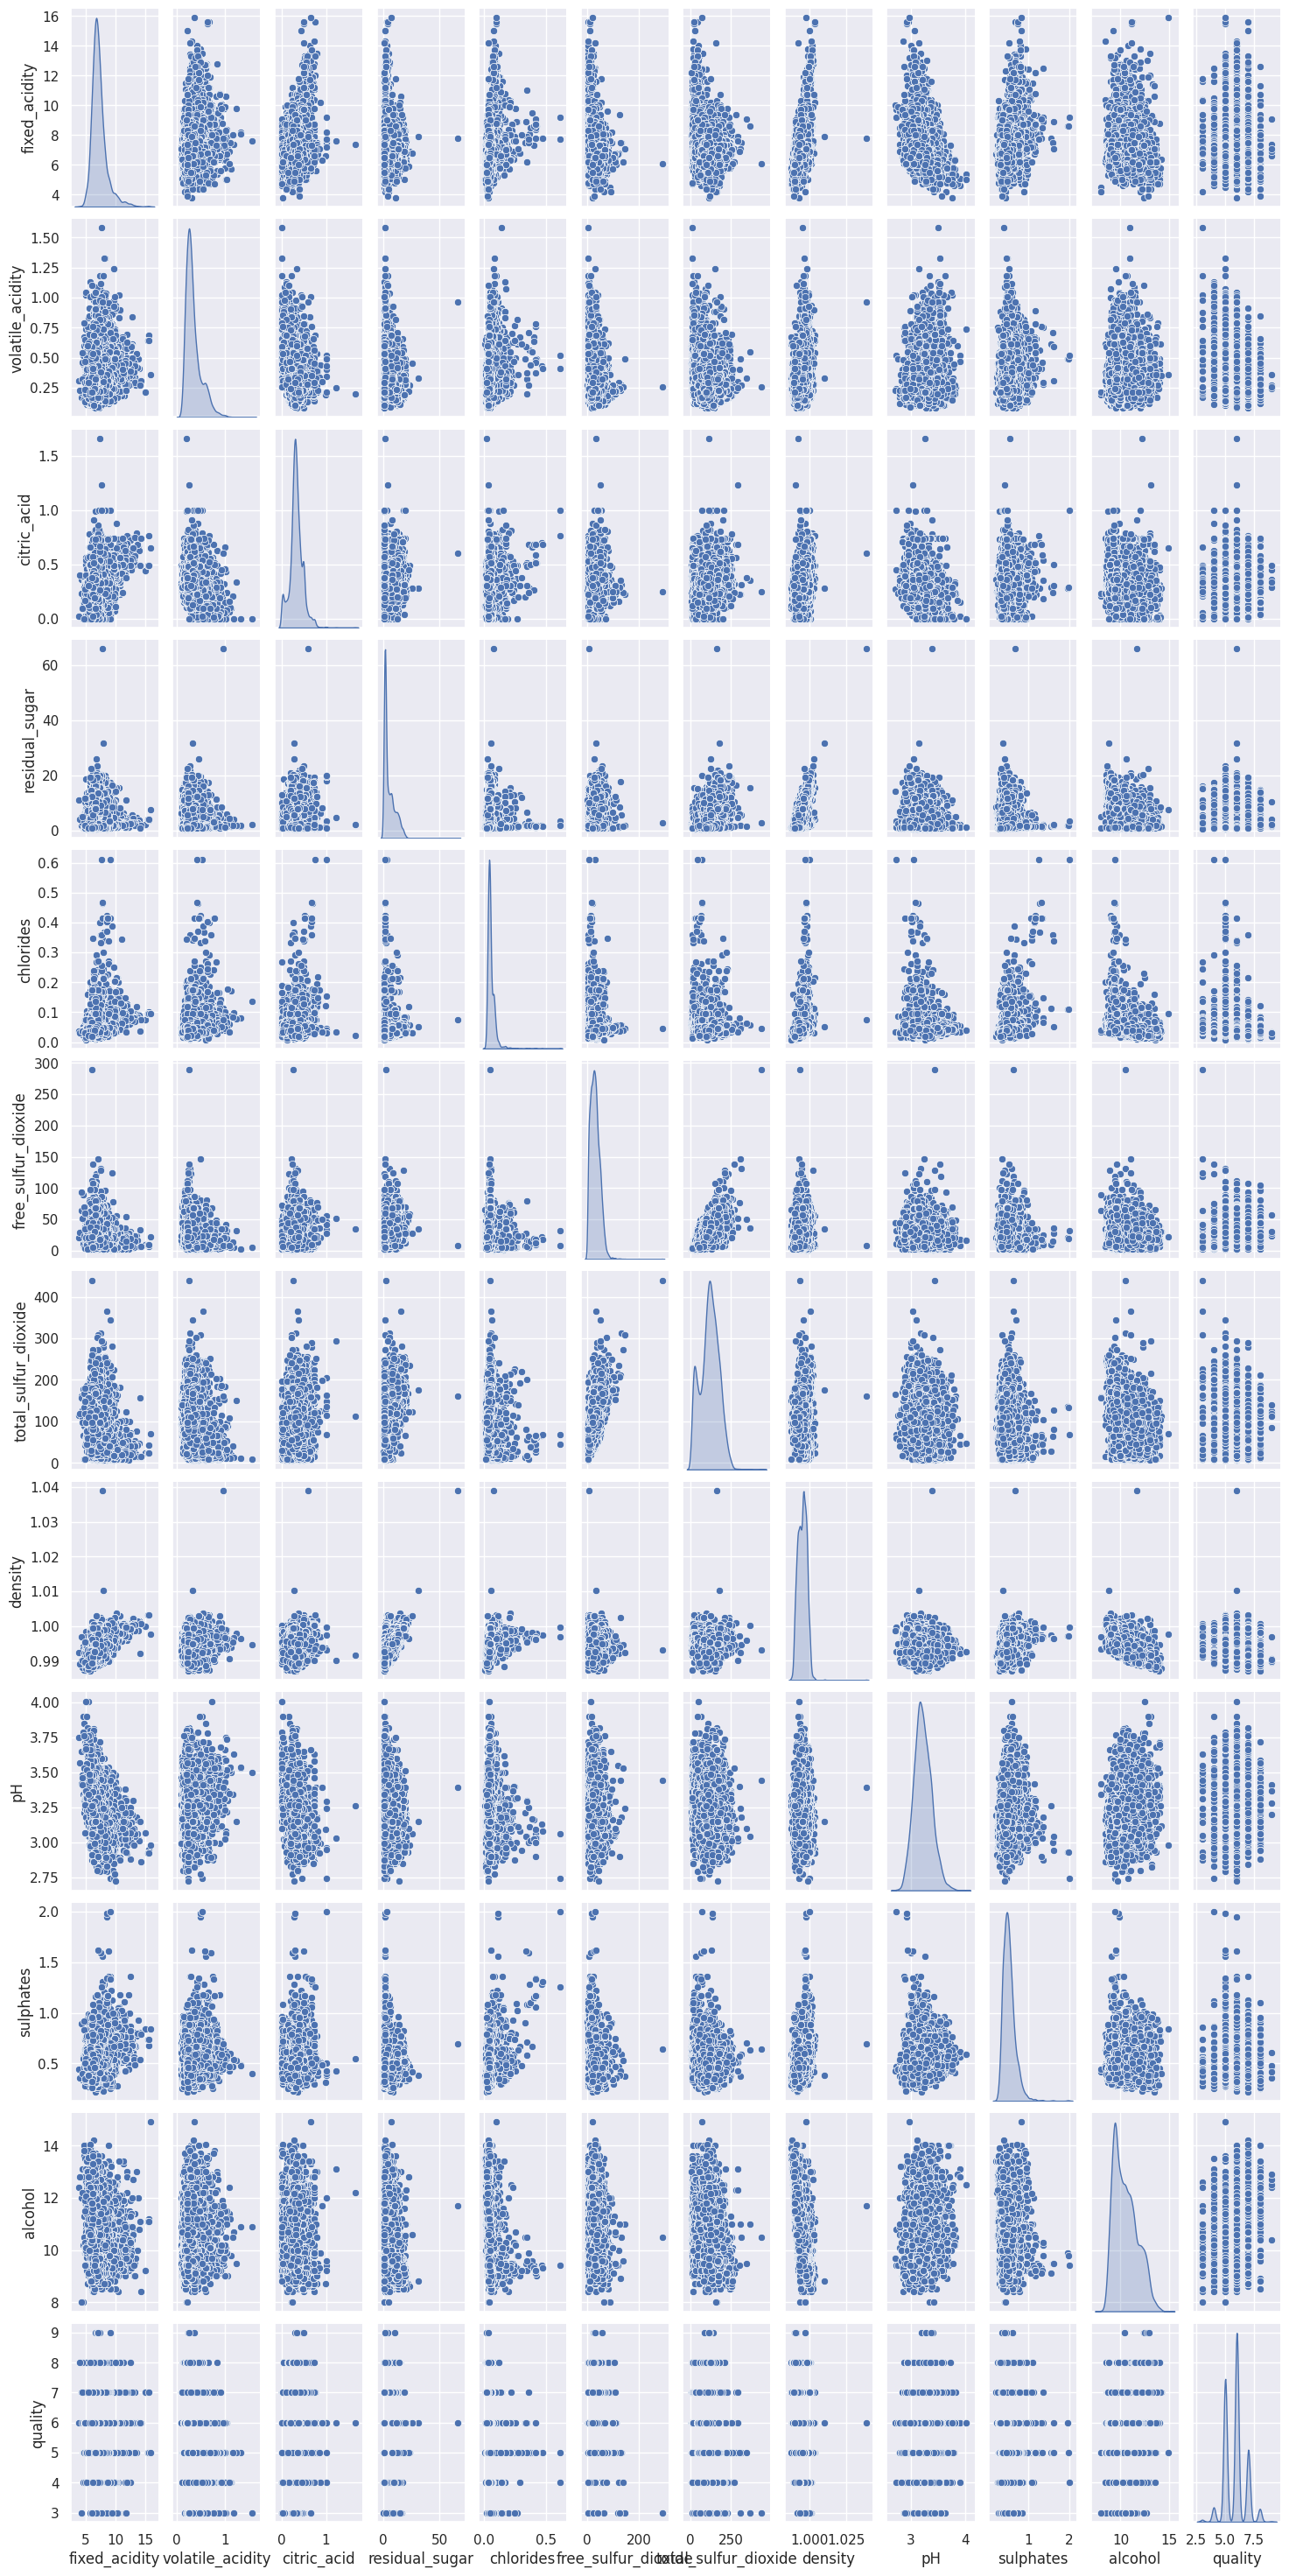

In [33]:
# pair plot 
sns.pairplot(df, aspect=0.5 , diag_kind='kde')

This is a histogram pairplot of quality vs each individual property. The chemical property is on the x-axis, while the quality is on the y-axis. This histogram pairplot shows the count of a particular rank at a particular value of the property. For example for fixed acidity, there are a of quality=6 wines in the range of 5 to 10 for fixed acidity vs, the range of 10 to 15. As the wine quality increases, more the lower range of the fixed acidity has more points than the upper range.

Next, plot a heatmap to visualize features are correlated with each other.

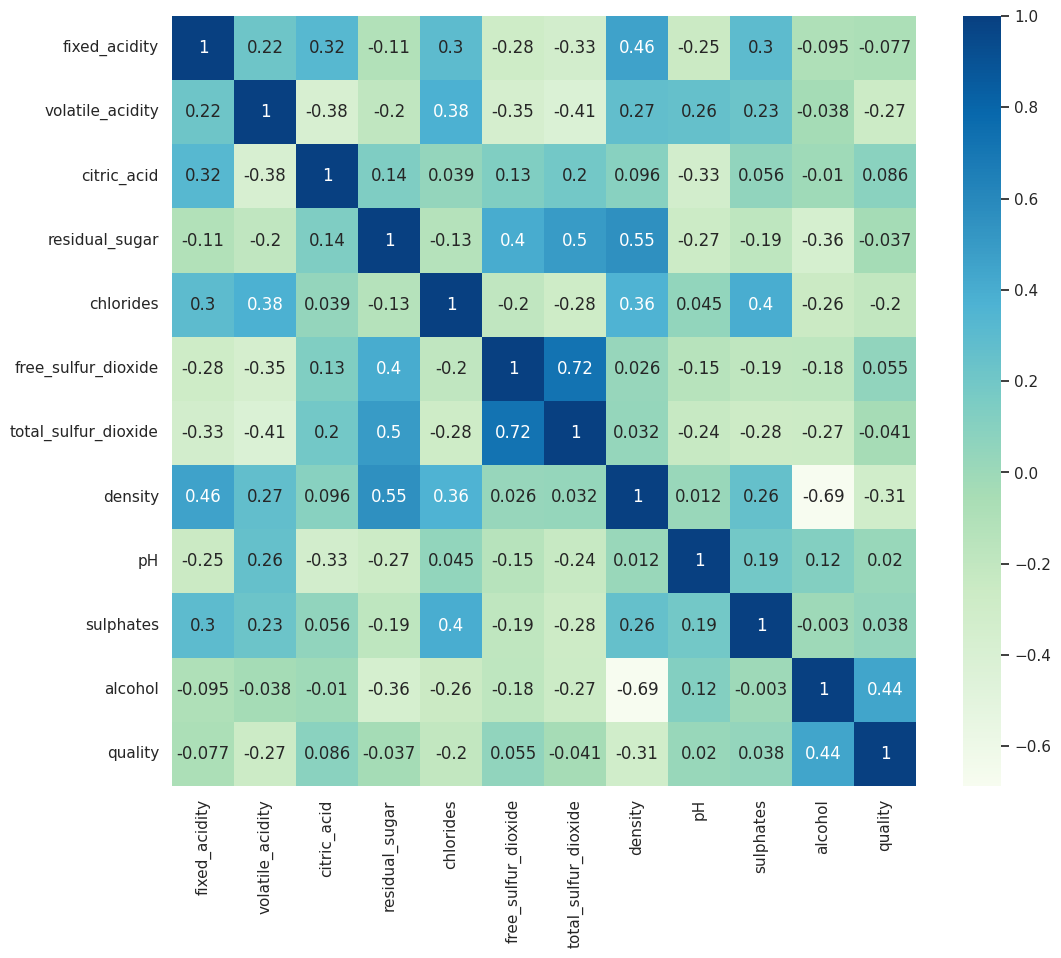

In [34]:
# Heatmap
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.GnBu)
plt.show()

The Heat map shows the correlation between each of the properties. The highest correlation seems to be between total sulfur dioxide and the color. This could mean that a particular color of wine has more total sulfur dioxide than the other color. 
For determining, which factor affects the quality the most, the highest correlation seems to be between quality and alcohol content.

<Axes: xlabel='quality', ylabel='count'>

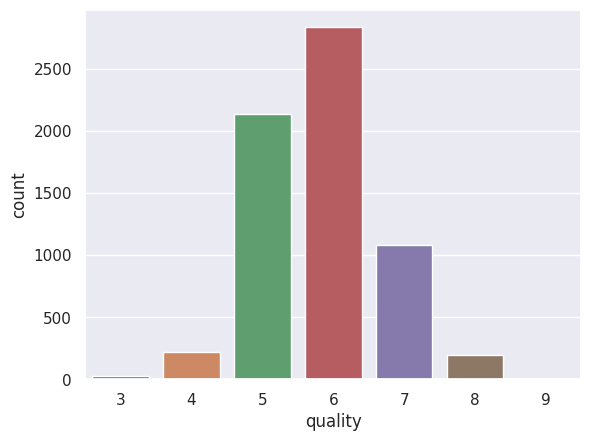

In [35]:
sns.countplot(x=df["quality"])

Here is is distribution of the wines by quality. They are centered around 5, 6 and 7. This could be a downside for our model building. 

In [36]:
df["quality"] =df["quality"].astype(int)
df = pd.get_dummies(df, columns=["quality"])

df.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0,1,0,0,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,0,1,0,0,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,0,1,0,0,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,0,0,1,0,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0,1,0,0,0,0


# Modeling the Data

## Preparing the Data

First we prepare the data so that we do not have bias later. We will also split the data into training and test set. The training set will be 75% and the test set will be 25%.

In [37]:
X = df.iloc[:,0:11].values # first columns
Y = df.iloc[:,12:].values # last columns

X = preprocessing.normalize(X, axis = 0)

X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.25)

print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)


(4872, 11) (4872, 6) (1625, 11) (1625, 6)


## Method

1. **Evaluate Models** Build a model
2. **Make Predictions or Plot the Accuracy** Make predictions and find accuracy or metrics of the model.
3. **Analyze** Analyze and make conclusion about the fit and accuracy of the model.

### Model Architecture ###
With a stronger sense of the training data and the goal, the next discussion is which model architecture to use and train for best results. Selecting the right model architecture is important because it will use the right amount of resources for the task, will not overfit the data, and will give accurate classification results.

### Options for Architecture ###
The loss function must be selected, with possible choices including mean absolute error (mae), mean squared error (mse), and Huber loss for regression loss calculations. This problem is a categorical classification problem so there are the options of using Categorical Cross Entropy.

Additionally the activation function for the linear units must be selected. Choices here include Sigmoid, TanH, and ReLU. Since ReLU has shown great promise with training Neural Network models and since it also can increase the speed of the model learning, that  will be one of the activation function selected here.

Additionally, it is possible to select strategies to optimize the hyperparameters of an Neural Network model and one of the most popular and effective strategies is Stochastic Gradient Descent. This will be the selected strategy for optimizing the Neural Network to reduce loss.

In [38]:
def model_performance_graphs(classifier, acc):
    

    fig, axes = plt.subplots(1, 2, figsize = (8, 3))

    axes[0].plot(classifier.epoch, classifier.history[acc], label = 'acc')
    axes[0].set_title('Accuracy vs Epochs', fontsize = 12)
    axes[0].set_xlabel('Epochs', fontsize = 10)
    axes[0].set_ylabel('Accuracy', fontsize = 10)
    axes[0].legend()

    axes[1].plot(classifier.epoch, classifier.history['loss'], label = 'loss')
    axes[1].set_title("Loss Curve",fontsize=12)
    axes[1].set_xlabel("Epochs",fontsize=10)
    axes[1].set_ylabel("Loss",fontsize=10)
    axes[1].legend()

    plt.show()

## Basic Stochastic Gradient Descent

Stochastic gradient descent (SGD) is a method for finding a minimum of a function by iteratively taking steps in the direction of the negative gradient of the function at the current point. The steps are chosen randomly, hence the name "stochastic". SGD is a popular algorithm for training neural networks.

SGD works by repeatedly taking steps in the direction of the negative gradient of the loss function. The loss function is a measure of how well the model fits the training data. The gradient of the loss function is a vector that points in the direction of greatest increase in the loss function. By taking steps in the opposite direction of the gradient, SGD can find a minimum of the loss function.

In [39]:
mod1 = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

In [40]:
mod1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               6144      
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 dense_7 (Dense)             (None, 1)                 513       
                                                                 
Total params: 531,969
Trainable params: 531,969
Non-trainable params: 0
_________________________________________________________________


In [41]:
mod1.compile(
    optimizer='adam',
    loss='mae',
    metrics = ["accuracy"]
)

In [42]:
history1 = mod1.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test),
    batch_size=256,
    epochs=100,
)

Epoch 1/100
20/20 [==============================] - 2s 37ms/step - loss: 0.1703 - accuracy: 0.8340 - val_loss: 0.1664 - val_accuracy: 0.8344
Epoch 2/100
20/20 [==============================] - 1s 28ms/step - loss: 0.1666 - accuracy: 0.8340 - val_loss: 0.1658 - val_accuracy: 0.8344
Epoch 3/100
20/20 [==============================] - 1s 43ms/step - loss: 0.1661 - accuracy: 0.8340 - val_loss: 0.1656 - val_accuracy: 0.8344
Epoch 4/100
20/20 [==============================] - 1s 45ms/step - loss: 0.1664 - accuracy: 0.8340 - val_loss: 0.1664 - val_accuracy: 0.8344
Epoch 5/100
20/20 [==============================] - 1s 47ms/step - loss: 0.1665 - accuracy: 0.8340 - val_loss: 0.1662 - val_accuracy: 0.8344
Epoch 6/100
20/20 [==============================] - 1s 36ms/step - loss: 0.1664 - accuracy: 0.8340 - val_loss: 0.1659 - val_accuracy: 0.8344
Epoch 7/100
20/20 [==============================] - 1s 27ms/step - loss: 0.1661 - accuracy: 0.8340 - val_loss: 0.1657 - val_accuracy: 0.8344
Epoch 

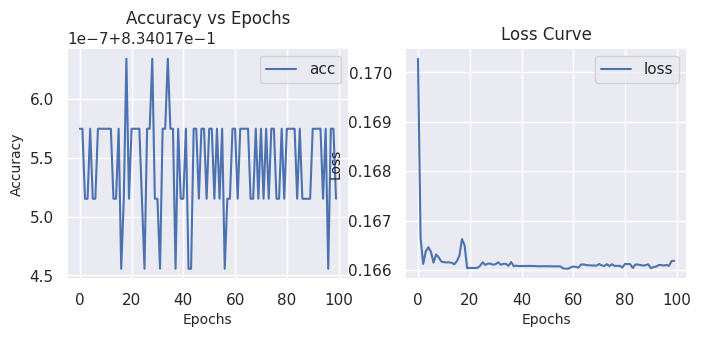

In [43]:
model_performance_graphs(history1, "accuracy")

In [44]:
train1_acc = mod1.evaluate(x = X_train, y = Y_train)
print()
print ("Train Accuracy = " + str(train1_acc[1]))
print()
test1_acc = mod1.evaluate(x = X_test, y = Y_test)
print()
print ("Loss = " + str(test1_acc[0]))
print ("Test Accuracy = " + str(test1_acc[1]))

153/153 [==============================] - 1s 3ms/step - loss: 0.1660 - accuracy: 0.8340

Train Accuracy = 0.8340182900428772

51/51 [==============================] - 0s 4ms/step - loss: 0.1657 - accuracy: 0.8344

Loss = 0.165687695145607
Test Accuracy = 0.8343589305877686


The accuracy of our model is pretty high. We can attempt to improve the accuracy by utilizing other techniques


## Dropout and Batch Normalization

Dropout and batch normalization are two techniques used to improve the performance of neural networks. Dropout works by randomly dropping out (setting to zero) a certain percentage of neurons during each training epoch. This forces the network to learn more robust features that are not dependent on any single neuron. Batch normalization works by normalizing the inputs to each layer of the network, which helps to prevent the values from becoming too large or too small.

In [45]:
mod2 = Sequential()
# layer 1
mod2.add(Dense(30, input_dim=11, activation='relu', name='fc0',kernel_regularizer=regularizers.l2(0.01)))
mod2.add(BatchNormalization(momentum=0.99, epsilon=0.001))
#layer 2
mod2.add(Dense(50, name='fc1',bias_initializer='zeros'))
mod2.add(Activation('tanh'))
mod2.add(BatchNormalization(momentum=0.99, epsilon=0.001))
mod2.add(Dropout(0.5))
#layer 3
mod2.add(Dense(100, name='fc2',bias_initializer='zeros'))
mod2.add(Activation('relu'))
mod2.add(BatchNormalization(momentum=0.99, epsilon=0.001))
mod2.add(Dropout(0.5))
#layer 4
mod2.add(Dense(6, name='fc3',bias_initializer='zeros'))
mod2.add(Activation('softmax'))
mod2.add(BatchNormalization(momentum=0.99, epsilon=0.001))

In [46]:
mod2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc0 (Dense)                 (None, 30)                360       
                                                                 
 batch_normalization_4 (Batc  (None, 30)               120       
 hNormalization)                                                 
                                                                 
 fc1 (Dense)                 (None, 50)                1550      
                                                                 
 activation_3 (Activation)   (None, 50)                0         
                                                                 
 batch_normalization_5 (Batc  (None, 50)               200       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 50)               

In [47]:
Adam = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
mod2.compile(optimizer = Adam, loss = "mae", metrics = ["accuracy"])

In [48]:
history2 = mod2.fit(x = X_train, y = Y_train, epochs = 100,verbose=1, batch_size = 64,validation_data=(X_test, Y_test))

Epoch 1/100
77/77 [==============================] - 3s 8ms/step - loss: 0.9232 - accuracy: 0.1882 - val_loss: 0.3982 - val_accuracy: 0.1631
Epoch 2/100
77/77 [==============================] - 0s 5ms/step - loss: 0.7745 - accuracy: 0.2377 - val_loss: 0.3616 - val_accuracy: 0.1729
Epoch 3/100
77/77 [==============================] - 0s 5ms/step - loss: 0.6275 - accuracy: 0.2917 - val_loss: 0.3279 - val_accuracy: 0.4215
Epoch 4/100
77/77 [==============================] - 0s 5ms/step - loss: 0.4973 - accuracy: 0.3502 - val_loss: 0.3253 - val_accuracy: 0.4215
Epoch 5/100
77/77 [==============================] - 0s 5ms/step - loss: 0.4119 - accuracy: 0.3890 - val_loss: 0.2613 - val_accuracy: 0.4215
Epoch 6/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3449 - accuracy: 0.4438 - val_loss: 0.2515 - val_accuracy: 0.4289
Epoch 7/100
77/77 [==============================] - 0s 5ms/step - loss: 0.2929 - accuracy: 0.4516 - val_loss: 0.2518 - val_accuracy: 0.4843
Epoch 8/100
7

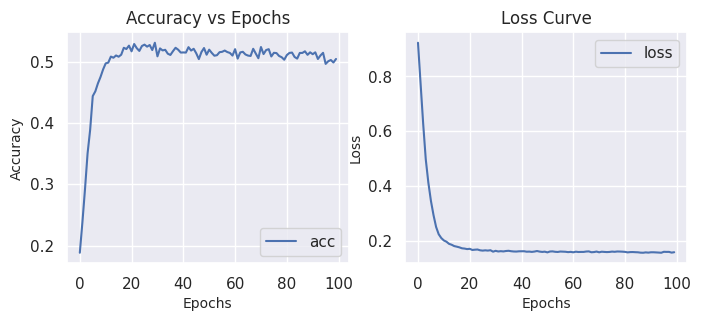

In [49]:
model_performance_graphs(history2, "accuracy")

In [50]:
train2_acc = mod2.evaluate(x = X_train, y = Y_train)
print()
print ("Train Accuracy = " + str(train2_acc[1]))
print()
test2_acc = mod2.evaluate(x = X_test, y = Y_test)
print()
print ("Loss = " + str(test2_acc[0]))
print ("Test Accuracy = " + str(test2_acc[1]))

153/153 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.5230

Train Accuracy = 0.522988498210907

51/51 [==============================] - 0s 3ms/step - loss: 0.1520 - accuracy: 0.5311

Loss = 0.15203529596328735
Test Accuracy = 0.5310769081115723


Unfortunately, the accuracy of our model reduced when utilizing dropout and batch normalization. When the network is small relative to the dataset, regularization is usually unnecessary. If the model capacity is already low, lowering it further by adding regularization will hurt performance.
Additionally, there are some cases where Batch Normalization can actually hurt the performance of a neural network. For example, if the batch size is too small, Batch Normalization can introduce noise into the training process. Additionally, if the network is very deep, Batch Normalization can make it difficult for the network to learn long-range dependencies.

# Conclusion

In conclusion, I first used a basic stochastic gradient descent algorithm with our wine data. We got an accuracy of nearly 85%. When I introduced dropout and batch normalization, I saw a decrease in our accuracy. 

This is the best I could obtain without overfitting. The algorithm might perform better with a better distribution among the different scores. An other explanation might be that wine testing is strongly subjective.

Neural network models are a powerful tool for machine learning. They can be used to solve a wide variety of problems, including classification. However, neural network models can be difficult to train and can be prone to overfitting.

Overfitting is a phenomenon in machine learning where a model performs well on the training data but poorly on the test data. This happens when the model learns the noise in the training data instead of the underlying patterns. While there was a disparity in the accuracies of the two different models, there was little to no difference between the training and testing accuracies of each model. 

Overall, neural network models are a powerful tool for machine learning. However, it is important to be aware of their limitations and to use them carefully.


### References ###

- https://www.kaggle.com/code/ryanholbrook/a-single-neuron
- https://www.kaggle.com/code/davidzarebski/a-neural-net-for-red-wine-quality-estimation
-https://www.kaggle.com/code/rprkh15/red-wine-quality-xgboost-optuna-neural-networks#Prediction-Using-Neural-Networks